# Prédicteur des résultats des matchs de la Premier League

## Import de librairies et des données

La librairie `pandas` sera utilisée pour l'analyse et la manipulation de données

In [1]:
import pandas as pd

Import du `.csv` des données de match sous la forme d'un en tant que *data frame* en considérant la première rangée comme titres des colonnes

In [2]:
matchs = pd.read_csv('epl_2015-2025.csv')

## Nettoyer les données

### Renommer les noms de variables et valeurs

En analysant la taille des données, on remarque $23$ variables différentes et $3690$ observations totales

Les significations des noms de variables sont explicités dans le fichier `column_def.txt`, il sera important de les modifier au sein du dataframe pour faciliter la compréhension

In [3]:
print(matchs.shape)
print(matchs.columns)

(3691, 23)
Index(['Date', 'Season', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR'],
      dtype='object')


Les noms des variables sont changés à l'aide de la fonction `.rename` et l'argument `inplace=True` pour modifier le *data frame* existant

In [4]:
matchs.rename(columns={'HomeTeam':'Domicile',
                        'AwayTeam':'Exterieur',
                        'FTR':'Resultat',
                        'HTR':'Resultat (mi-temps)',
                        'FTHG':'Buts domicile', 
                        'FTAG':'Buts exterieur',
                        'HTHG':'But domicile (mi-temps)',
                        'HTAG':'But exterieur (mi-temps)',
                        'HS':'Tirs domicile',
                        'AS':'Tirs exterieur',
                        'HST':'Tirs cadres domicile',
                        'HST':'Tirs cadres domicile',
                        'AST':'Tirs cadres exterieur',
                        'HF':'Fautes domicile',
                        'AF':'Fautes exterieur',
                        'HC':'Corners domicile',
                        'AC':'Corners exterieur',
                        'HY':'Cartons jaunes domicile',
                        'AY':'Cartons jaunes exterieur',
                        'HR':'Cartons rouges domicile',
                        'AR':'Cartons rouges exterieur',
                        'Referee':'Arbitre',
                        'Season':'Saison'
                        }, inplace=True)

Une fois les noms de colonnes modifiés, on peut maintenant mieux visualiser les données au sein du *data frame* en appellant la méthode `df.head()`

In [5]:
matchs.head()

,Date,Saison,Domicile,Exterieur,Buts domicile,Buts exterieur,Resultat,But domicile (mi-temps),But exterieur (mi-temps),Resultat (mi-temps),...,Tirs cadres domicile,Tirs cadres exterieur,Fautes domicile,Fautes exterieur,Corners domicile,Corners exterieur,Cartons jaunes domicile,Cartons jaunes exterieur,Cartons rouges domicile,Cartons rouges exterieur
0,08/08/2015,2015-2016,Bournemouth,Aston Villa,0,1,A,0,0,D,...,2,3,13,13,6,3,3,4,0,0
1,08/08/2015,2015-2016,Chelsea,Swansea,2,2,D,2,1,H,...,3,10,15,16,4,8,1,3,1,0
2,08/08/2015,2015-2016,Everton,Watford,2,2,D,0,1,A,...,5,5,7,13,8,2,1,2,0,0
3,08/08/2015,2015-2016,Leicester,Sunderland,4,2,H,3,0,H,...,8,5,13,17,6,3,2,4,0,0
4,08/08/2015,2015-2016,Man United,Tottenham,1,0,H,1,0,H,...,1,4,12,12,1,2,2,3,0,0


On peut maintenant remplacer les données des colonnes `Resultat` et `Resultat (mi-temps)` par des noms plus explicites dans le buts de faciliter l'analyse à l'aide de la méthode `df.map()`

In [6]:
map_resultat = {'H':'Victoire domicile', 'D':'Nul', 'A':'Victoire exterieur'}
matchs['Resultat'] = matchs['Resultat'].map(map_resultat)
matchs['Resultat (mi-temps)'] = matchs['Resultat (mi-temps)'].map(map_resultat)

In [7]:
print(matchs['Resultat'])

0       Victoire exterieur
1                      Nul
2                      Nul
3        Victoire domicile
4        Victoire domicile
               ...        
3686     Victoire domicile
3687                   Nul
3688    Victoire exterieur
3689     Victoire domicile
3690     Victoire domicile
Name: Resultat, Length: 3691, dtype: object


### Faire du *feature engineering* sur les variables

Dans le but d'avoir un modèle capable de prédire le plus efficacement possible les résultats futurs, il est important de penser et créer différentes variables qui permettraient d'estimer le mieux possible la variable cible du modèle, représentée dans ce cas-ci par le résultat du match (Victoire, Défaite, Nul)

Également, pour que nos données puissent être passées à travers différents algorithmes dans le but de prédire les résultats futurs, on doit s'assurer que le type des variables concernées soit des `float`, `int`, `datetime` ou des variables catégorielles

En appellant `pd.info()` on peut voir que la première colonne à modifier serait `Date` pour la mettre en format `datetime` en appellant `pd.to_datetime()`

In [8]:
print(matchs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3691 entries, 0 to 3690
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      3691 non-null   object
 1   Saison                    3691 non-null   object
 2   Domicile                  3691 non-null   object
 3   Exterieur                 3691 non-null   object
 4   Buts domicile             3691 non-null   int64 
 5   Buts exterieur            3691 non-null   int64 
 6   Resultat                  3691 non-null   object
 7   But domicile (mi-temps)   3691 non-null   int64 
 8   But exterieur (mi-temps)  3691 non-null   int64 
 9   Resultat (mi-temps)       3691 non-null   object
 10  Arbitre                   3691 non-null   object
 11  Tirs domicile             3691 non-null   int64 
 12  Tirs exterieur            3691 non-null   int64 
 13  Tirs cadres domicile      3691 non-null   int64 
 14  Tirs cadres exterieur   

#### Transformer le format des dates

En apellant `pd.to_datetime()` on obtient une erreur en raison des rangées de $381$ à $760$ qui sont formattées de la manière `%Y-%m-%d` au lieu de `%d/%m/%Y` tel qu'accepté par la méthode

Nous devons regarder de plus près pour voir ce qui cause l'erreur et pouvoir y remédier

In [9]:
print(matchs['Date'][380:759])

380    2013-08-16
381    2013-08-16
382    2013-08-16
383    2013-08-16
384    2013-08-16
          ...    
754    2021-05-17
755    2021-05-17
756    2021-05-17
757    2021-05-17
758    2021-05-17
Name: Date, Length: 379, dtype: object


##### Rectifier les dates erronnées

En analysant les résultats obtenus, on s'apperçoit que de nombreuses dates ont été enregistrées de manière erronnée ce qui fausse l'information au sein du *data frame*

En recherchant en ligne les résultat du match correspondant à l'entrée $2013-08-16$ opposant les équipes `Burnley` et `Swansea` $(0-1)$, on s'apperçoit qu'il a réellement eu lieu à la date $13/08/2016$

C'est le même cas pour les entrées suivantes: par exemple lors du cas du match correspondant à l'entrée $2021-05-17$ opposant les équipes `Watford` et `Man City` $(5-1)$, qui a réellement eu lieu à la date $21/05/2017$

On doit donc créer un script afin de pouvoir modifier ces rangées pour les transformer par la suite, celui-ci devra inverser les chiffres représentant les années avec ceux représentant les jours et remplacer les `-` avec des `/`

In [10]:
for i in range(380, 760):                                     # on itère à travers une liste de la longueur des rangées contenant des dates fautives
    row = matchs['Date'][i]                                   # on spécifie qu'on itère à travers la colonne Date du data frame
    jour = row[2:4]                                           # on extrait les valeurs de l'année qui représenteront les jours ex: (20XX-05-17) -> (XX/05/2017)
    mois = row[5:7]                                           # on extrait les valeurs du mois qui resteront les mêmes ex: (2021-XX-17) -> (21/XX/2017)
    annee = row[-2:]                                          # on extrait les valeurs des jours qui deviendront les dernières valeurs des années ex: (2021-05-XX) -> (21/05/20XX)
    matchs.loc[i, 'Date'] = f'{jour}/{mois}/20{annee}'        # on combine maintenant les valeurs relevés en remplaçant les - avec des / pour correspondre au format datetime et on les remplace au sein de la colonne

In [11]:
print(matchs['Date'][380:760])

380    13/08/2016
381    13/08/2016
382    13/08/2016
383    13/08/2016
384    13/08/2016
          ...    
755    21/05/2017
756    21/05/2017
757    21/05/2017
758    21/05/2017
759    21/05/2017
Name: Date, Length: 380, dtype: object


On observe donc que les dates sont maintenant correctes et peuvent donc être converties avec `pd.to_datetime()` en précisant l'argument `dayfirst=True`

In [12]:
matchs['Date'] = pd.to_datetime(matchs['Date'], dayfirst=True)

Avec les dates, on peut maintenant créer d'autres variables représentant les jours et les mois de la semaine, pour évaluer si certaines équipes jouent mieux ou moins bien durant certaines jours ou certains mois de l'année

In [13]:
matchs['JoursSemaine'] = matchs['Date'].dt.day_of_week
matchs['Mois'] = matchs['Date'].dt.month

#### Représenter les saisons

Pour ce qui en est de la variable saison on peut choisir de la transformer en `int` en considérant l'année de début de chaque saison. 
Par exemple, la saison $2015-2016$ deviendra $2015$, $2016-2017$ deviendra $2016$ et ainsi de suite

Pour ce faire, on `str.split` avec `-` et on convertit la colonne en type `int`

In [14]:
matchs['AnneeSaison'] = matchs['Saison'].str.split('-').str[0].astype(int)

À partir de cette nouvelle variable, on peut maintenant créer la variable `SemaineSaison` visant à déterminer la semaine de la saison à laquelle le match a eu lieu, certaines équipes performant mieux au début, au milieu ou à la fin de la saison

Pour ce faire, on associe dans `JoursSaison` le nombre de jours depuis le début de la saison $(5$ $août)$ et on divise par la suite cette colonne par $7$ pour obtenir la semaine de la saison durant laquelle l'équipe a joué

In [15]:
matchs['JoursSaison'] = matchs.apply(lambda x: (x['Date'] - pd.Timestamp(year=x['AnneeSaison'], month=8, day=5)).days, axis=1)      # fonction anonyme calculant le nombre de jours écoulés depuis le 5 août pour chaque saison
matchs['SemaineSaison'] = matchs['JoursSaison'] // 7 + 1                                                                            # on ajoute 1 ici pour faire commencer la fonction à la semaine 1 comme son typiquement affichés les matchs

#### Représenter la valeur cible du modèle

Les colonnes `Resultat` et `Resultat (mi-temps)` peuvent être réassignés dans une colonne catégorielle pour représenter $1$ dans le cas d'une victoire, $0$ dans le cas d'une défaite et $2$ dans le cas d'un nul. On utilise donc `df.map` une nouvelle fois pour réassigner ces valeurs. La valeur cible de notre modèle sera donc représentée par la colonne `Cible`, indiquant si l'équipe a gagné, perdu ou a égalisé. C'est la valeur que l'on cherchera à prédire à l'aide du reste des variables

Dans le cadre de la présente modélisation, nous avons choisi de ne pas inclure l'arbitre comme variable au modèle, pas besoin de devoir ainsi convertir cette variable spécifique

In [16]:
map_resultat_cat = {'Victoire exterieur':'0', 'Nul':'1', 'Victoire domicile':'2'}
matchs['Cible'] = (matchs['Resultat'].map(map_resultat_cat)).astype('int')
matchs['ResultatMT'] = (matchs['Resultat (mi-temps)'].map(map_resultat_cat)).astype('category')

#### Représenter les équipes

Les valeurs des équipes dans le *data frame* sont présentement des strings et ne peuvent pas être considérées comme des intrants au modèle. Il est nécessaire de les encoder en utilisant un code numérique à l'aide de la méthode `.cat.codes` de pandas. Par le fait même, on s'assure donc que le même code soit utilisé par les équipes domicile et celles à l'extérieur

Le code sera déterminé par odre alpabétique, *Arsenal* se verra donc associéee au code $0$, *Aston Villa* au code $1$ et ainsi de suite

On crée premièrement un nouveau *data frame* contenant les valeurs uniques des équipes

In [17]:
equipes = pd.concat([matchs['Domicile'], matchs['Exterieur']]).unique()             # on combine dans une liste les deux colonnes des équipes en conservant les valeurs uniques pour éviter le dédoublement
equipes_df = pd.DataFrame({'Equipe':equipes})                                       # transformer la liste en data frame

On associe par la suite un code numérique à chacune des équipes

In [18]:
equipes_df['CodeEquipe'] = equipes_df['Equipe'].astype('category').cat.codes            # on convertit en catégorie et on utilise cat.codes pour associer un code numérique à chaque équipe
code_equipe = dict(zip(equipes_df['Equipe'], equipes_df['CodeEquipe']))                 # on crée un dictionnaire pour pouvoir mapper les noms d'équipe aux différents codes

matchs['DomicileCode'] = matchs['Domicile'].map(code_equipe)                            # avec map on peut maintenant associer un code à chaque équipe du data frame original
matchs['ExterieurCode'] = matchs['Exterieur'].map(code_equipe)

In [19]:
# test
for i in range(len(matchs)):
    index = matchs.iloc[i]
    if index['Domicile'] == 'Arsenal' or index['Exterieur'] == 'Arsenal':
        print(index[['Domicile', 'DomicileCode', 'Exterieur', 'ExterieurCode']])

Domicile          Arsenal
DomicileCode            0
Exterieur        West Ham
ExterieurCode          32
Name: 6, dtype: object
Domicile         Crystal Palace
DomicileCode                  8
Exterieur               Arsenal
ExterieurCode                 0
Name: 17, dtype: object
Domicile           Arsenal
DomicileCode             0
Exterieur        Liverpool
ExterieurCode           16
Name: 29, dtype: object
Domicile         Newcastle
DomicileCode            21
Exterieur          Arsenal
ExterieurCode            0
Name: 35, dtype: object
Domicile         Arsenal
DomicileCode           0
Exterieur          Stoke
ExterieurCode         26
Name: 40, dtype: object
Domicile         Chelsea
DomicileCode           7
Exterieur        Arsenal
ExterieurCode          0
Name: 52, dtype: object
Domicile         Leicester
DomicileCode            15
Exterieur          Arsenal
ExterieurCode            0
Name: 60, dtype: object
Domicile            Arsenal
DomicileCode              0
Exterieur        Man 

#### Représenter les performances récentes des équipes

Il faut maintenant une manière de pouvoir évaluer la performance récente des équipes ou leur forme car il s'agit souvent d'un bon estimateur de ses résultats suivants. Une équipe venant de gagner plusieurs matchs consécutifs et qui est donc en bonne forme a généralement plus de confiance et cohésion et les points accumullés dans les matchs récents reflètent également les ajustements tactiques, le conditionnement des joueurs, leur moral et l'élan ainsi que les stratégies de l'équipe

On créera donc une fonction `forme_equipe` qui consulte les 5 matchs les plus récents pour chaque équipe et attribue $3$ points pour une victoire, $1$ point pour un match nul et $0$ pour une défaite

In [20]:
def forme_equipe(matchs):                      
    matchs = matchs.sort_values('Date')                 # on trie les données par date
    matchs['DomicileForme'] = 0                         # on initialise deux colonnes ou seront stockés les points de forme
    matchs['ExterieurForme'] = 0

    for i in range(len(matchs)):                        # on itère à travers les matchs
        match_eval = matchs.iloc[i]                     # on stocke les information du match évalué dans la variable match_eval
        equipe_domicile = match_eval['DomicileCode']
        equipe_exterieur = match_eval['ExterieurCode']
        date_match = match_eval['Date']

        # pour l'équipe à domicile la fonction trouve tous les matchs antérieurs à la date du match actuel où l'équipe a joué et les trie par date décroissante en consérvant les 5 plus récents
        prec_domicile = matchs[(matchs['Date'] < date_match) & 
                               ((matchs['DomicileCode'] == equipe_domicile) | (matchs['ExterieurCode'] == equipe_domicile))]
        prec_domicile = prec_domicile.sort_values('Date', ascending=False).head(5)
        
        # même processus pour l'équipe à l'extérieur
        prec_exterieur = matchs[(matchs['Date'] < date_match) & 
                                ((matchs['DomicileCode'] == equipe_exterieur) | (matchs['ExterieurCode'] == equipe_exterieur))]
        prec_exterieur = prec_exterieur.sort_values('Date', ascending=False).head(5)

        # calcul des points de forme pour l'équipe à domicile
        # on initialise la variable qui comptera le nombre de points récoltés à domicile
        points_domicile = 0
        for j in range(len(prec_domicile)):             # on itère à travers les matchs précédents
            match_prec = prec_domicile.iloc[j]          # on stocke les informations de chaque itération du match précédant dans la variable match_prec
            # on itére à travers les 5 derniers matchs et on ajoute 3 points pour chaque victoire à domicile ou à l'extérieur
            if match_prec['DomicileCode'] == equipe_domicile and match_prec['Cible'] == 2:
                points_domicile += 3
            elif match_prec['ExterieurCode'] == equipe_domicile and match_prec['Cible'] == 1:
                points_domicile += 3
            # on ajoute 1 point pour les matchs nuls
            elif (match_prec['DomicileCode'] == equipe_domicile or match_prec['ExterieurCode'] == equipe_domicile) and match_prec['Cible'] == 0:
                points_domicile += 1

        # on répète la même procédure pour l'équipe à l'extérieur
        points_exterieur = 0
        for j in range(len(prec_exterieur)):          
            match_prec = prec_exterieur.iloc[j]          
            if match_prec['DomicileCode'] == equipe_exterieur and match_prec['Cible'] == 2:
                points_exterieur += 3
            elif match_prec['ExterieurCode'] == equipe_exterieur and match_prec['Cible'] == 1:
                points_exterieur += 3
            elif (match_prec['DomicileCode'] == equipe_exterieur or match_prec['ExterieurCode'] == equipe_exterieur) and match_prec['Cible'] == 0:
                points_exterieur += 1

        # on met à jour les colonnes récoltant le total des points à domicile et à l'extérieur
        matchs.at[i, 'DomicileForme'] = points_domicile
        matchs.at[i, 'ExterieurForme'] = points_exterieur
    
    # on crée une nouvelle colonne récoltant la différence entre les points à domicile et à l'extérieur
    matchs['DiffForme'] = matchs['DomicileForme'] - matchs['ExterieurForme']

    return matchs

On peut maintenant appliquer la fonction créée au *data frame* original et stocker le nouveau *data frame* dans la variable `matchs_features`

In [21]:
matchs_forme = forme_equipe(matchs)

#### Représenter l'historique des face-à-face précédents

L'historique des confrontations directes entres deux équipes s'agit également d'un indicateur clé en ce qui concerne leur performance future s'ils avaient à s'affronter à nouveau.

On créera donc une fonction `faf_equipes` (face-à-face) qui canalyse l'historique des confrontations directes entre deux équipes pour créer des caractéristiques utiles à la prédiction

In [22]:
def faf_equipes(matchs):
    matchs = matchs.sort_values('Date')                 # on trie les données par date
    matchs['FAF_VictoiresDomicile'] = 0                 # on initialise deux colonnes ou seront stockés les victoires en face-à-face
    matchs['FAF_VictoiresExterieur'] = 0
    matchs['FAF_Nuls'] = 0

    for i in range(len(matchs)):
        match_eval = matchs.iloc[i]                     # on stocke les information du match évalué dans la variable match_eval
        equipe_domicile = match_eval['DomicileCode']
        equipe_exterieur = match_eval['ExterieurCode']
        date_match = match_eval['Date']

        # on cherche à travers tous les matchs précédent la date du match évalué pour stocker dans prec_faf les matchs ou les deux équipes ont joué l'une contre l'autre
        prec_faf = matchs[(matchs['Date'] < date_match) & 
                    (((matchs['DomicileCode'] == equipe_domicile) & (matchs['ExterieurCode'] == equipe_exterieur)) | 
                    ((matchs['DomicileCode'] == equipe_exterieur) & (matchs['ExterieurCode'] == equipe_domicile)))]

        # calcul du nombre de victoires et de matchs nuls lors des face-à-face
        # on initialise les variables qui vont compter les victoires et les matchs nuls lors des faces-à-faces
        victoires_domicile = 0
        victoires_exterieur = 0
        nuls = 0
        
        for j in range(len(prec_faf)):                  # on itère à travers les matchs précédents
            faf = prec_faf.iloc[j]                      # on stocke les informations de chaque itération du match précédant dans la variable faf
            # on commence par itérer à travers le cas où l'équipe à évaluer (Domicile) a joué un face-à-face également à domicile
            if faf['DomicileCode'] == equipe_domicile: 
                # on augmente la variable victoire_domicile dans l'éventualité où l'équipe à évaluer a gagné
                if faf['Cible'] == 2:
                    victoires_domicile += 1
                # on augmente la variable nuls dans le cas ou c'était un match nul
                elif faf['Cible'] == 1:
                    nuls += 1
                # on augmente la variable victoire_extérieur dans l'éventualité où l'équipe à évaluer a perdu
                elif faf['Cible'] == 0:
                    victoires_exterieur += 1
            # on répète la même procédure dans le cas où l'équipe à évaluer a joué un face-à-face à l'extérieur
            elif faf['DomicileCode'] == equipe_exterieur: 
                if faf['Cible'] == 2:
                    victoires_exterieur += 1
                elif faf['Cible'] == 1:
                    nuls += 1
                elif faf['Cible'] == 0:
                    victoires_domicile += 1
        
        # on met à jour les colonnes récoltant le total des victoires et matchs nuls en face-à-face
        matchs.at[i, 'FAF_VictoiresDomicile'] = victoires_domicile
        matchs.at[i, 'FAF_VictoiresExterieur'] = victoires_exterieur
        matchs.at[i, 'FAF_Nuls'] = nuls
    
    return matchs

In [23]:
matchs_features = faf_equipes(matchs_forme)

En analysant les données récoltées par les fonctions, on s'apperçoit que pour les $191$ premiers matchs, les données de forme des équipes et de face-à-face ont souvent des valeurs de $0$ car les équipes n'ont pas encore toutes jouées leur premier match et n'ont pas encore fait face a chacun des adversaires de la ligue

Afin de ne pas fausser le modèle, nous allons exclure ces premiers matchs du jeu de données utilisé pour la prédiction. On utilise la méthode `.reset_index` pour réindexer le *data frame* en indiquant avec `drop=True` de ne pas conserver les anciens indices

In [24]:
matchs_features = matchs_features.sort_values('Date').iloc[192:].reset_index(drop=True)

In [25]:
vals = [
    'Date', 'DomicileCode', 'Domicile', 'ExterieurCode', 'Exterieur', 
    'DomicileForme', 'ExterieurForme', 'DiffForme', 'FAF_VictoiresDomicile', 
    'FAF_VictoiresExterieur', 'FAF_Nuls', 'SemaineSaison',
    'Mois', 'AnneeSaison', 'Cible' 
]

matchs_features[vals].to_csv('vals.csv')

Les variables et le jeu de données que nous allons utiliser pour la prédiction sont maintenants prêtes a être utilisées comme intrants au modèle

## Créer le modèle prédictif

La librairie `scikit-learn` sera utilisée pour la modélisation prédictive, le modèle choisi est le random forest, pour son efficacité auprès de données non-linéaires et sont utilisation fréquente pour l'analytique sportive

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import matplotlib.pyplot as plt

On sépare les données d'entraînement et les données de test $(80/20)$ split. Dans ce cas-ci il est important de les séparer de façon chronologique comme il s'agit de données temporelles. Les données ont déjà été ordonnées selon la date au moment de d'extraire les $192$ premières

In [27]:
split = int(len(matchs_features) * 0.8)                      # on définit un point de coupure (dans ce cas-ci 80% d'entraînement pour 20% de test)
train = matchs_features.iloc[:split]                         # on sépare en données d'entraînement
test = matchs_features.iloc[split:]                          # et en données de test

print(f"Période d'entraînement: {train['Date'].min()} à {train['Date'].max()}")         # on imprime les dates d'entraînement et de test à titre de référence
print(f"Période de test: {test['Date'].min()} à {test['Date'].max()}")

Période d'entraînement: 2016-01-02 00:00:00 à 2023-04-30 00:00:00
Période de test: 2023-04-30 00:00:00 à 2025-02-27 00:00:00


On définit maintenant les variables prédictrices et la variable cible allant être utilisées par le modèle parmi celles créées plus tôt

In [28]:
features = [
    'DomicileCode', 'ExterieurCode', 'DomicileForme', 
    'ExterieurForme', 'DiffForme', 'FAF_VictoiresDomicile', 
    'FAF_VictoiresExterieur', 'FAF_Nuls', 'SemaineSaison',
    'Mois', 'AnneeSaison'
]

target = ['Cible']

On peut maintenant préparer les données d'entraînement et de test

In [29]:
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

On précise par la suite les paramètres du modèles en l'associant à la variable `rf` et on l'entraîne sur les ensembles d'entraînement

In [30]:
model =xgb.XGBClassifier(objective='multi:softmax', num_classes=3, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8, colsample_bytree=0.8, random_state=42)
model.fit(X_train, y_train)

/Users/gab/Desktop/school/hec_w25/python/projet/.venv/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [13:26:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "num_classes" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_classes=3, ...)

On peut maintenant tester le modèle en associant les prédictions à `y_pred` et en obtenant le score ainsi que le rapport de classification

In [31]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Exactitude du modèle: {accuracy:.4f}")
print(f"Rapport de classification:")
print(class_report)

Exactitude du modèle: 0.4900
Rapport de classification:
              precision    recall  f1-score   support

           0       0.48      0.40      0.44       230
           1       0.33      0.07      0.11       160
           2       0.50      0.77      0.61       310

    accuracy                           0.49       700
   macro avg       0.44      0.41      0.39       700
weighted avg       0.46      0.49      0.44       700



Afin de savoir quels *features* ont le plus d'importance pour le model on peut utiliser la fonction `feature_importances_`

Importance des features:
                        Importance
ExterieurCode             0.137770
DomicileCode              0.132238
FAF_VictoiresDomicile     0.088104
DiffForme                 0.086559
Mois                      0.084725
DomicileForme             0.083265
AnneeSaison               0.081693
FAF_VictoiresExterieur    0.080474
ExterieurForme            0.077323
FAF_Nuls                  0.075042
SemaineSaison             0.072806


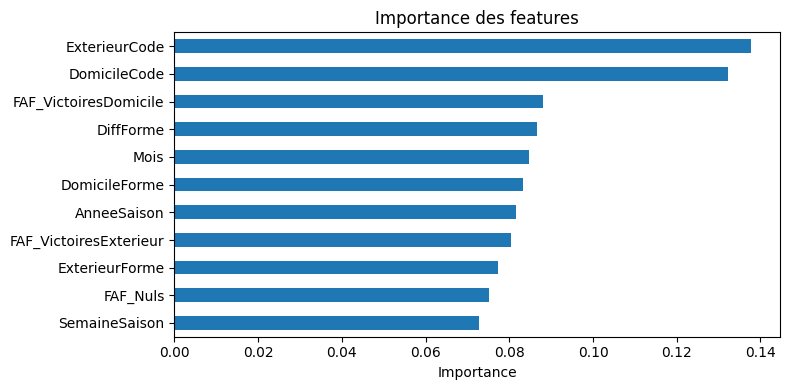

In [32]:
feature_importance = pd.DataFrame({
    'Importance': model.feature_importances_
},index=features).sort_values('Importance', ascending=False)

print("Importance des features:")
print(feature_importance)

feature_importance.plot(kind='barh', figsize=(8, 4), legend=False)
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Importance des features')
plt.tight_layout()
plt.show()

In [33]:
print("\nDistribution des classes:")
print("Ensemble d'entraînement:")
print(y_train.value_counts(normalize=True).sort_index() * 100)
print("\nEnsemble de test:")
print(y_test.value_counts(normalize=True).sort_index() * 100)


Distribution des classes:
Ensemble d'entraînement:
Cible
0        31.975706
1        23.079671
2        44.944623
Name: proportion, dtype: float64

Ensemble de test:
Cible
0        32.857143
1        22.857143
2        44.285714
Name: proportion, dtype: float64
